
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `D:\documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
movealpha = lambda x: list(tuple([x[-1]]) + tuple(x[:-1]))

In [4]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [5]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [6]:
import pandas as pd

In [7]:
def make_dcoll_df(dists, norm, tot, exp=0):
    
    coll =  nb.frame(
        {
        'freq':dists['freq'].astype(int),
        'score':(dists.freq/dists.freq.sum())**exp*abs(norm/dists['2']), 
        'dist':dists['1'],
            'dist_' : dists['2'],
        'reference':(dists.freq/dists.freq.sum())/tot.tot
        }
    ).transpose()
    coll = coll.fillna(0)
    return coll.astype({'freq':'int32'})

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [8]:
tot = nb.frame(nb.totals(50000), 'tot')

In [9]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [10]:
smd = 5
lmd = 10
collword = 'skrive'

In [11]:
def filenames(smd = smd, lmd = lmd, collword = collword, corpus_size= 1000, period = (1980, 2000)):
    return {
    'small_right': '_'.join([collword, str(smd), str(corpus_size), '-'.join([str(x) for x in period]), str(0), str(int(2*smd)), '.csv']),
    'large_right': '_'.join([collword, str(smd), str(corpus_size),  '-'.join([str(x) for x in period]), str(0), str(int(2*lmd)), '.csv']),
    'small_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*smd)), str(0), '.csv']),
    'large_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*lmd)), str(0), '.csv'])
        }

# Store the data subsequent use

In [12]:
names = filenames()
names

{'small_right': 'skrive_5_1000_1980-2000_0_10_.csv',
 'large_right': 'skrive_5_1000_1980-2000_0_20_.csv',
 'small_left': 'skrive_10_1000_1980-2000_10_0_.csv',
 'large_left': 'skrive_10_1000_1980-2000_20_0_.csv'}

In [13]:
a1 = pd.read_csv(names['small_right'], index_col=0)
a2 = pd.read_csv(names['large_right'], index_col=0)
b1 = pd.read_csv(names['small_left'], index_col=0)
b2 = pd.read_csv(names['large_left'], index_col=0)


## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [14]:
coll = make_dcoll_df(a1, lmd, tot)

In [15]:
collb = make_dcoll_df(b1, lmd, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [16]:
coll[coll.freq > 20].sort_values(by='score', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
ned,313,5.74713,1.7296,1.74,7.16901
dikt,72,5.49451,1.77256,1.82,38.9332
dagbok,32,4.73934,2.00407,2.11,83.9508
navnet,85,4.2735,2.30714,2.34,15.8935
under,183,4.1841,2.36801,2.39,2.83401
brev,228,4.04858,2.4523,2.47,41.2071
artikkel,56,3.84615,2.55,2.6,23.9479
ordet,22,3.78788,2.50556,2.64,4.4553
bøker,46,3.63636,2.69378,2.75,13.4909
stil,33,3.62319,2.67076,2.76,18.5076


In [17]:
coll.sort_values(by='reference', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
resept,15,3.42466,2.73148,2.92,110.16
diktat,7,1.58479,6.44444,6.31,97.5141
stiler,10,2.5,3.83333,4,96.6695
memoarer,8,4.2735,1.88889,2.34,95.0721
selvbiografi,7,2.80112,3.25,3.57,86.3675
dagbok,32,4.73934,2.00407,2.11,83.9508
låter,14,5.18135,1.65385,1.93,77.9857
tastaturet,10,1.78253,5.62037,5.61,69.6236
skrivemaskin,7,1.59744,6.38889,6.26,68.3601
redigere,9,2.65957,3.54167,3.76,58.5683


In [18]:
coll.loc[[',','.', 'og','eller', 'i', 'på','ned']]

,freq,score,dist,dist_,reference
",",2649,1.858736,5.378655,5.38,0.753565
.,3757,1.876173,5.326698,5.33,0.933303
og,1671,1.855288,5.389590,5.39,0.966833
eller,342,2.066116,4.840187,4.84,1.823320
i,1235,1.739130,5.754632,5.75,0.843717
på,1080,2.136752,4.681068,4.68,1.648530
ned,313,5.747126,1.729599,1.74,7.169013


# collb

In [20]:
collb

,freq,score,dist,dist_,reference
!,78,1.587302,-6.312719,-6.30,0.547359
"""",108,1.602564,-6.244079,-6.24,0.593634
#,1,1.818182,-6.000000,-5.50,0.190595
%,3,1.303781,-8.750000,-7.67,0.074093
&,7,1.547988,-6.625000,-6.46,0.266907
...,...,...,...,...,...
▼,0,0.000000,0.000000,0.00,0.000000
★,0,0.000000,0.000000,0.00,0.000000
♦,0,0.000000,0.000000,0.00,0.000000
✓,0,0.000000,0.000000,0.00,0.000000


In [21]:
collb.sort_values(by='reference', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
Skrive,13,1.23762,-8.29167,-8.08,91.9171
tekstbehandling,7,2.07039,-4.72222,-4.83,78.6377
lese,378,3.23625,-3.08231,-3.09,75.2155
Lese,5,3.7037,-2,-2.7,72.5122
startes,10,1.68067,-6,-5.95,71.6954
Outlook,7,1.97239,-5,-5.07,65.8289
Styre,5,1.65017,-6.2,-6.06,58.2704
skriveren,9,2.7248,-3.44444,-3.67,57.1086
tastaturet,8,1.59236,-6.38889,-6.28,55.6989
skrivere,5,2.12766,-4.5,-4.7,55.0622


In [22]:
collb.sort_values(by='score', ascending=False)[:40].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
å,4105,4.83092,-2.06549,-2.07,7.00712
tenkt,30,4.21941,-2.26614,-2.37,4.66071
begynt,29,4.20168,-2.27222,-2.38,9.35367
Å,87,3.95257,-2.49871,-2.53,6.33278
oppdrag,18,3.93701,-2.37037,-2.54,10.3253
Prøv,6,3.87597,-2,-2.58,6.96534
kunnet,16,3.87597,-2.38095,-2.58,6.65892
villet,6,3.87597,-2,-2.58,5.54723
slippe,10,3.77358,-2.33333,-2.65,3.50646
fortsatte,26,3.73134,-2.57197,-2.68,3.96702


In [23]:
common = coll.loc[[',','.', 'og','eller', 'i', 'på']]


In [24]:
common['translate'] = [',', '.', 'and', 'or', 'in', 'on']

common = common[movealpha(common.columns)]



In [25]:

common

,translate,freq,score,dist,dist_,reference
",",",",2649,1.858736,5.378655,5.38,0.753565
.,.,3757,1.876173,5.326698,5.33,0.933303
og,and,1671,1.855288,5.389590,5.39,0.966833
eller,or,342,2.066116,4.840187,4.84,1.823320
i,in,1235,1.739130,5.754632,5.75,0.843717
på,on,1080,2.136752,4.681068,4.68,1.648530


In [26]:
top10ratio = coll.sort_values(by='score', ascending=False)[:10]

In [27]:
top10ratio.index

Index(['referat', 'ned', 'dikt', 'kjærlighetsbrev', 'søknader', 'hovedoppgave',
       'postnavnet', 'låter', 'programmene', 'romaner'],
      dtype='object')

In [28]:
top10ratio['translate'] = ['minutes', 'down', 'poems', 'love letters', 'applications', 'master thesis',
       'postal name', 'songs', 'programs', 'novels']

In [29]:
top10ratio  = top10ratio[movealpha(top10ratio.columns)]

In [30]:
top10ratio

,translate,freq,score,dist,dist_,reference
referat,minutes,7,6.097561,1.000000,1.64,21.736460
ned,down,313,5.747126,1.729599,1.74,7.169013
dikt,poems,72,5.494505,1.772565,1.82,38.933198
kjærlighetsbrev,love letters,7,5.263158,1.300000,1.90,0.000000
søknader,applications,5,5.263158,1.000000,1.90,12.992538
hovedoppgave,master thesis,8,5.263158,1.388889,1.90,34.394171
postnavnet,postal name,5,5.263158,1.000000,1.90,0.000000
låter,songs,14,5.181347,1.653846,1.93,77.985702
programmene,programs,5,5.076142,1.083333,1.97,16.092123
romaner,novels,10,4.975124,1.625000,2.01,19.599639


# coll

# jaccard similarity

compare over a range

In [31]:
rng = range(2,40,2)

# for collb

In [32]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb, 'reference', 'score', x) for x in rng}
                            }).transpose()

Text(0, 0.5, 'Jaccard score')

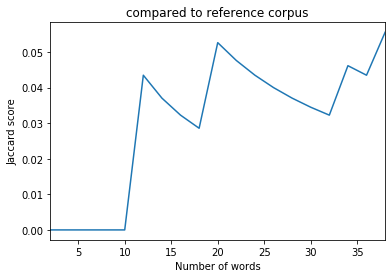

In [33]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [34]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll[coll.freq > 20], 'score', 'reference', x) for x in rng}     }).transpose()

Text(0, 0.5, 'Jaccard score')

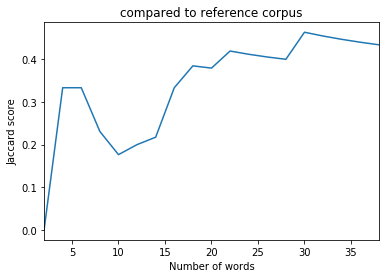

In [35]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

In [36]:
coll.loc[coll[coll.score > 4].index].sort_values(by='score', ascending=False)

,freq,score,dist,dist_,reference
referat,7,6.097561,1.000000,1.64,21.736460
ned,313,5.747126,1.729599,1.74,7.169013
dikt,72,5.494505,1.772565,1.82,38.933198
kjærlighetsbrev,7,5.263158,1.300000,1.90,0.000000
postnavnet,5,5.263158,1.000000,1.90,0.000000
søknader,5,5.263158,1.000000,1.90,12.992538
hovedoppgave,8,5.263158,1.388889,1.90,34.394171
låter,14,5.181347,1.653846,1.93,77.985702
programmene,5,5.076142,1.083333,1.97,16.092123
romaner,10,4.975124,1.625000,2.01,19.599639


In [37]:
coll.loc[coll[coll.reference> 30].index].sort_values(by='reference', ascending=False)

,freq,score,dist,dist_,reference
resept,15,3.424658,2.731481,2.92,110.160418
diktat,7,1.584786,6.444444,6.31,97.514087
stiler,10,2.500000,3.833333,4.00,96.669498
memoarer,8,4.273504,1.888889,2.34,95.072102
selvbiografi,7,2.801120,3.250000,3.57,86.367543
dagbok,32,4.739336,2.004074,2.11,83.950795
låter,14,5.181347,1.653846,1.93,77.985702
tastaturet,10,1.782531,5.620370,5.61,69.623615
skrivemaskin,7,1.597444,6.388889,6.26,68.360110
redigere,9,2.659574,3.541667,3.76,58.568307


In [39]:
set(coll[coll.reference > 30].index) & set(coll[coll.score > 3.5].index)

{'biografi',
 'brev',
 'dagbok',
 'dikt',
 'essays',
 'exit',
 'forord',
 'hovedoppgave',
 'lapper',
 'låter',
 'memoarer',
 'reserverte',
 'roman',
 'rosende'}